# B2

In [11]:
import pandas as pd
import json

# Assuming your JSON data is stored in a variable or file
with open('results/grid_search_results.json') as f:
    data = json.load(f)
# Normalize the JSON data
df = pd.json_normalize(data, sep='_')

# If you need to explode the time_series (if it contains multiple values per entry)
# df = df.explode('time_series').reset_index(drop=True)

print(df.head())

                                          best_route  best_distance  \
0  27->13->46->26->25->15->22->20->14->23->10->36...     347.546702   
1  39->34->33->48->47->49->42->32->36->22->13->21...     311.539406   
2  31->28->29->25->22->21->7->12->13->15->16->2->...     176.440617   
3  31->45->19->11->7->2->6->26->33->44->18->30->4...     340.859555   
4  15->2->10->4->8->9->14->1->19->27->17->38->34-...     309.509444   

                                         time_series  convergence_time  \
0  [[0.005483599998115096, 0.002452937030664071],...          3.003133   
1  [[0.003975300001911819, 0.0022907424885081056]...          3.001439   
2  [[0.004634500000975095, 0.0024024792848421628]...          2.999704   
3  [[0.0039593000037712045, 0.0022425359161613607...          3.001068   
4  [[0.005653000000165775, 0.002342016542833463],...          3.002946   

   parameters_n_population  parameters_K  parameters_mu  parameters_max_depth  
0                       50             2        

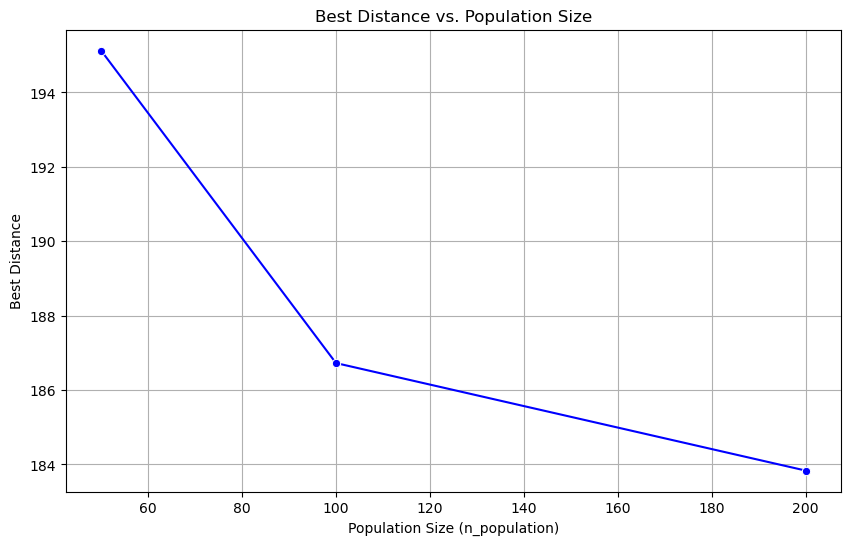

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='parameters_n_population',
    y='best_distance',
    marker='o',
    errorbar=None,  # or ('ci', 95) for confidence intervals
    color='b'
)
plt.xlabel('Population Size (n_population)')
plt.ylabel('Best Distance')
plt.title('Best Distance vs. Population Size')
plt.grid(True)
plt.savefig("figures/gridsearch-distancevspop")

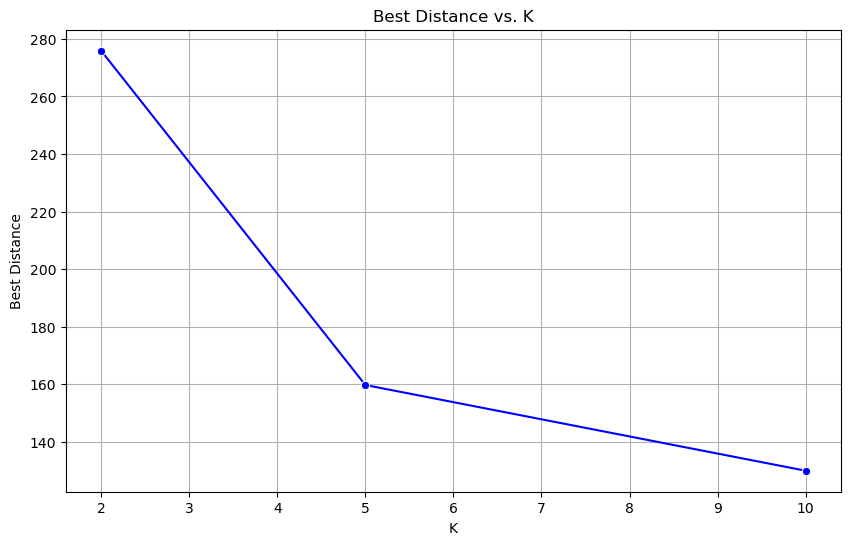

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='parameters_K',
    y='best_distance',
    marker='o',
    errorbar=None,  # or ('ci', 95) for confidence intervals
    color='b'
)
plt.xlabel('K')
plt.ylabel('Best Distance')
plt.title('Best Distance vs. K')
plt.grid(True)
plt.savefig("figures/gridsearch-distancevsk")

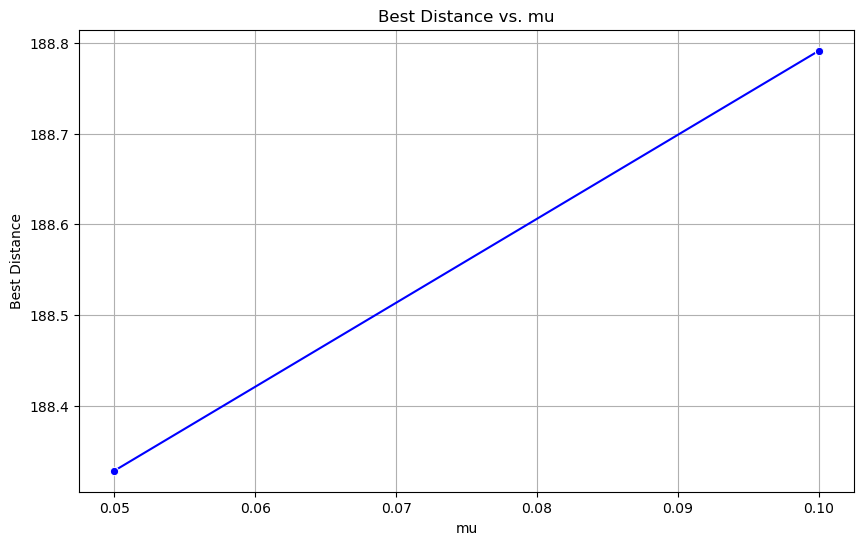

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='parameters_mu',
    y='best_distance',
    marker='o',
    errorbar=None,  # or ('ci', 95) for confidence intervals
    color='b'
)
plt.xlabel('mu')
plt.ylabel('Best Distance')
plt.title('Best Distance vs. mu')
plt.grid(True)
plt.savefig("figures/gridsearch-distancevsmu")

In [15]:
min_distance_row = df.loc[df['best_distance'].idxmin()]
print(min_distance_row)

best_route                 42->36->37->34->26->14->8->6->4->0->3->1->9->1...
best_distance                                                       119.9424
time_series                [[0.00998220000474248, 0.0025241088669420964],...
convergence_time                                                    3.006636
parameters_n_population                                                   50
parameters_K                                                              10
parameters_mu                                                           0.05
parameters_max_depth                                                       5
Name: 14, dtype: object


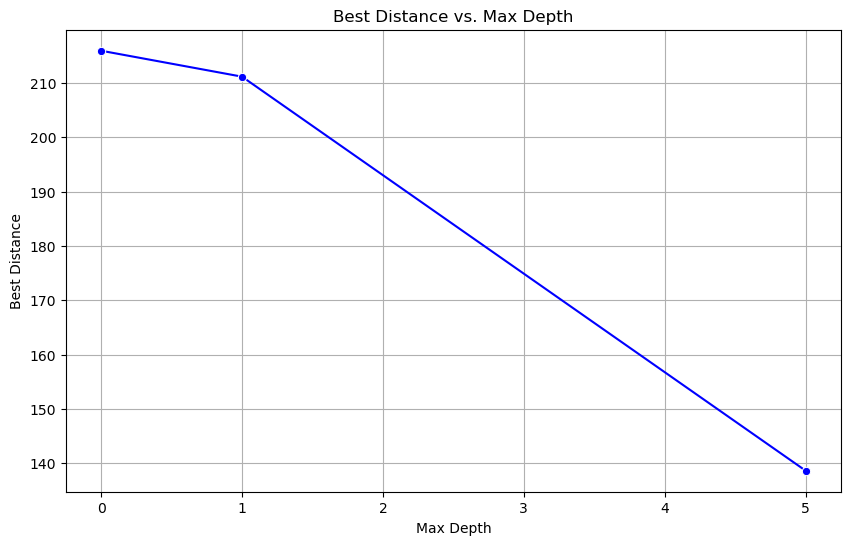

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='parameters_max_depth',
    y='best_distance',
    marker='o',
    errorbar=None,  # or ('ci', 95) for confidence intervals
    color='b'
)
plt.xlabel('Max Depth')
plt.ylabel('Best Distance')
plt.title('Best Distance vs. Max Depth')
plt.grid(True)
plt.savefig("figures/gridsearch-distancevsdepth")

In [ ]:
with open("d1655.tsp", "r") as f:
    lines = [f"{y} {z}" for (x,y,z) in list(map(lambda a: a.split(" "), f.readlines()))]
    with open("d1655_formatted.tsp", "w+") as f2:
        f2.writelines(lines)

TypeError: write() argument must be str, not tuple